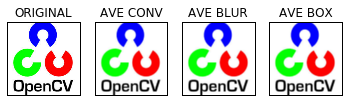

In [1]:
#フィルタリング系です
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/opencv.jpg')

kernel = np.ones((5, 5), np.float32) / 25 #5x5の平滑化フィルタ
dst = cv2.filter2D(img, -1, kernel)

blur = cv2.blur(img, (5, 5)) #これでもいい

box = cv2.boxFilter(img, 0, (5, 5)) #これでもOK

#BGR-RGB変換は省略
plt.subplot(141), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(dst, 'gray'), plt.title('AVE CONV')
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(blur, 'gray'), plt.title('AVE BLUR')
plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(box, 'gray'), plt.title('AVE BOX')
plt.xticks([]), plt.yticks([])
plt.show()

#境界処理はBORDER_DEFAULTになっているけどオプションで選択可能
#他にも設定できる引数があるので、必要に応じて使いましょう

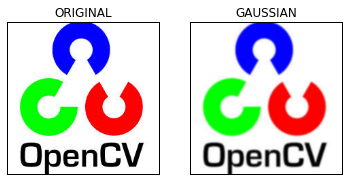

In [2]:
#ガウシアン
#なんでガウシアンを使うかというと、平滑化は処理は軽いけど、周波数領域で不連続にカットするから
#周波数特性があまり良くない

%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/opencv.jpg')

gaussian = cv2.GaussianBlur(img, (5, 5), 0) #サイズと標準偏差を指定0の場合カーネルサイズにフィットさせる

#BGR-RGB変換は省略
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian, 'gray'), plt.title('GAUSSIAN')
plt.xticks([]), plt.yticks([])
plt.show()

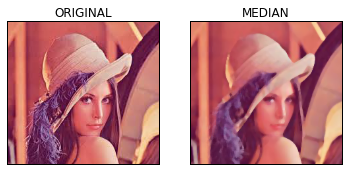

In [3]:
#メディアン　中央値フィルタ
#スパイクノイズを消す、ソートが必要なので割と処理は重い

%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lenna.jpg')

median = cv2.medianBlur(img, 5)


mpltImg = cv2.merge((img[:, :, 2], img[:, :, 1], img[:, :, 0]))
mpltMedian = cv2.merge((median[:, :, 2], median[:, :, 1], median[:, :, 0]))
plt.subplot(121), plt.imshow(mpltImg, 'gray'), plt.title('ORIGINAL')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(mpltMedian, 'gray'), plt.title('MEDIAN')
plt.xticks([]), plt.yticks([])
plt.show()

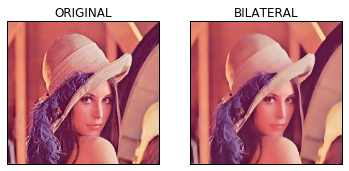

In [4]:
#バイラテラルフィルタ
#エッジを保存したまま、ノイズを除去するのに有効
#重い

%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lenna.jpg')

bilat = cv2.bilateralFilter(img, 9, 75, 75)
#引数はどれくらい遠くのピクセルを見に行くかと、どれくらい離れた色まで混ぜに行くかとかを決めるらしいけどいまいちよくわかんない


mpltImg = cv2.merge((img[:, :, 2], img[:, :, 1], img[:, :, 0]))
mpltBilat = cv2.merge((bilat[:, :, 2], bilat[:, :, 1], bilat[:, :, 0]))
plt.subplot(121), plt.imshow(mpltImg, 'gray'), plt.title('ORIGINAL')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(mpltBilat, 'gray'), plt.title('BILATERAL')
plt.xticks([]), plt.yticks([])
plt.show()

#レナさん少し若返ったような気がする